In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
merged_df = pd.read_csv('merged.csv')

In [118]:
merged_df.head()

Unnamed: 0        Date  XOM-Price  XOM-Yield  TSLA-Price  TSLA-Yield  \
0           0  2019-01-02     96.727      3.299      69.879      11.403   
1           1  2019-01-03     97.207      3.212      70.389      11.270   
2           2  2019-01-04     96.661      3.312      71.510      10.967   
3           3  2019-01-07     96.522      3.338      73.343      10.482   
4           4  2019-01-08     96.228      3.393      74.650      10.145   

   LLY-Price  LLY-Yield  AAPL-Price  AAPL-Yield  NVDA-Price  NVDA-Yield  \
0     96.732      3.320     100.954       3.253      95.504       3.881   
1     96.941      3.283     101.039       3.236      95.815       3.833   
2     96.669      3.332     100.570       3.332      95.113       3.942   
3     96.387      3.383     100.582       3.329      95.148       3.937   
4     96.293      3.400     100.506       3.345      95.093       3.946   

   JPM-Price  JPM-Yield  AMZN-Price  AMZN-Yield  V-Price  V-Yield  UNH-Price  \
0     98.867      4.100     102.784       3.278   98.797    3.345    101.817   
1     99.009      4.071     103.001       3.238   99.021    3.309    102.382   
2     98.790      4.115     102.475       3.335   98.436    3.405    101.808   
3     98.887      4.096     102.412       3.346   98.496    3.395    101.729   
4     98.915      4.091     102.230       3.380   98.337    3.421    101.715   

   UNH-Yield  Govt_Yield  XOM-spread  TSLA-spread  LLY-spread  AAPL-spread  \
0      3.437       2.633       0.666        8.770       0.687        0.620   
1      3.340       2.552       0.660        8.718       0.731        0.684   
2      3.438       2.668       0.644        8.299       0.664        0.664   
3      3.451       2.698       0.640        7.784       0.685        0.631   
4      3.454       2.730       0.663        7.415       0.670        0.615   

   NVDA-spread  JPM-spread  AMZN-spread  V-spread  UNH-spread  
0        1.248       1.467        0.645     0.712       0.804  
1        1.281       1.519        0.686     0.757       0.788  
2        1.274       1.447        0.667     0.737       0.770  
3        1.239       1.398        0.648     0.697       0.753  
4        1.216       1.361        0.650     0.691       0.724

In [119]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

companies = set(col.split('-')[0] for col in merged_df.columns if 'Price' in col)

In [120]:
merged_df.head()

Unnamed: 0       Date  XOM-Price  XOM-Yield  TSLA-Price  TSLA-Yield  \
0           0 2019-01-02     96.727      3.299      69.879      11.403   
1           1 2019-01-03     97.207      3.212      70.389      11.270   
2           2 2019-01-04     96.661      3.312      71.510      10.967   
3           3 2019-01-07     96.522      3.338      73.343      10.482   
4           4 2019-01-08     96.228      3.393      74.650      10.145   

   LLY-Price  LLY-Yield  AAPL-Price  AAPL-Yield  NVDA-Price  NVDA-Yield  \
0     96.732      3.320     100.954       3.253      95.504       3.881   
1     96.941      3.283     101.039       3.236      95.815       3.833   
2     96.669      3.332     100.570       3.332      95.113       3.942   
3     96.387      3.383     100.582       3.329      95.148       3.937   
4     96.293      3.400     100.506       3.345      95.093       3.946   

   JPM-Price  JPM-Yield  AMZN-Price  AMZN-Yield  V-Price  V-Yield  UNH-Price  \
0     98.867      4.100     102.784       3.278   98.797    3.345    101.817   
1     99.009      4.071     103.001       3.238   99.021    3.309    102.382   
2     98.790      4.115     102.475       3.335   98.436    3.405    101.808   
3     98.887      4.096     102.412       3.346   98.496    3.395    101.729   
4     98.915      4.091     102.230       3.380   98.337    3.421    101.715   

   UNH-Yield  Govt_Yield  XOM-spread  TSLA-spread  LLY-spread  AAPL-spread  \
0      3.437       2.633       0.666        8.770       0.687        0.620   
1      3.340       2.552       0.660        8.718       0.731        0.684   
2      3.438       2.668       0.644        8.299       0.664        0.664   
3      3.451       2.698       0.640        7.784       0.685        0.631   
4      3.454       2.730       0.663        7.415       0.670        0.615   

   NVDA-spread  JPM-spread  AMZN-spread  V-spread  UNH-spread  
0        1.248       1.467        0.645     0.712       0.804  
1        1.281       1.519        0.686     0.757       0.788  
2        1.274       1.447        0.667     0.737       0.770  
3        1.239       1.398        0.648     0.697       0.753  
4        1.216       1.361        0.650     0.691       0.724

In [121]:
def calculate_smas(data, short_window=10, long_window=50):
    for company in companies:
        spread_col = f'{company}-spread'  # Adjusted to match provided data
        
        # Calculate SMAs
        data[f'{company}-SMA_{short_window}'] = data[spread_col].rolling(window=short_window, min_periods = 1).mean()
        data[f'{company}-SMA_{long_window}'] = data[spread_col].rolling(window=long_window, min_periods = 1).mean()

# Call the SMA calculation function
calculate_smas(merged_df)

indicate where the trades are by adding in markers - look at medium for this

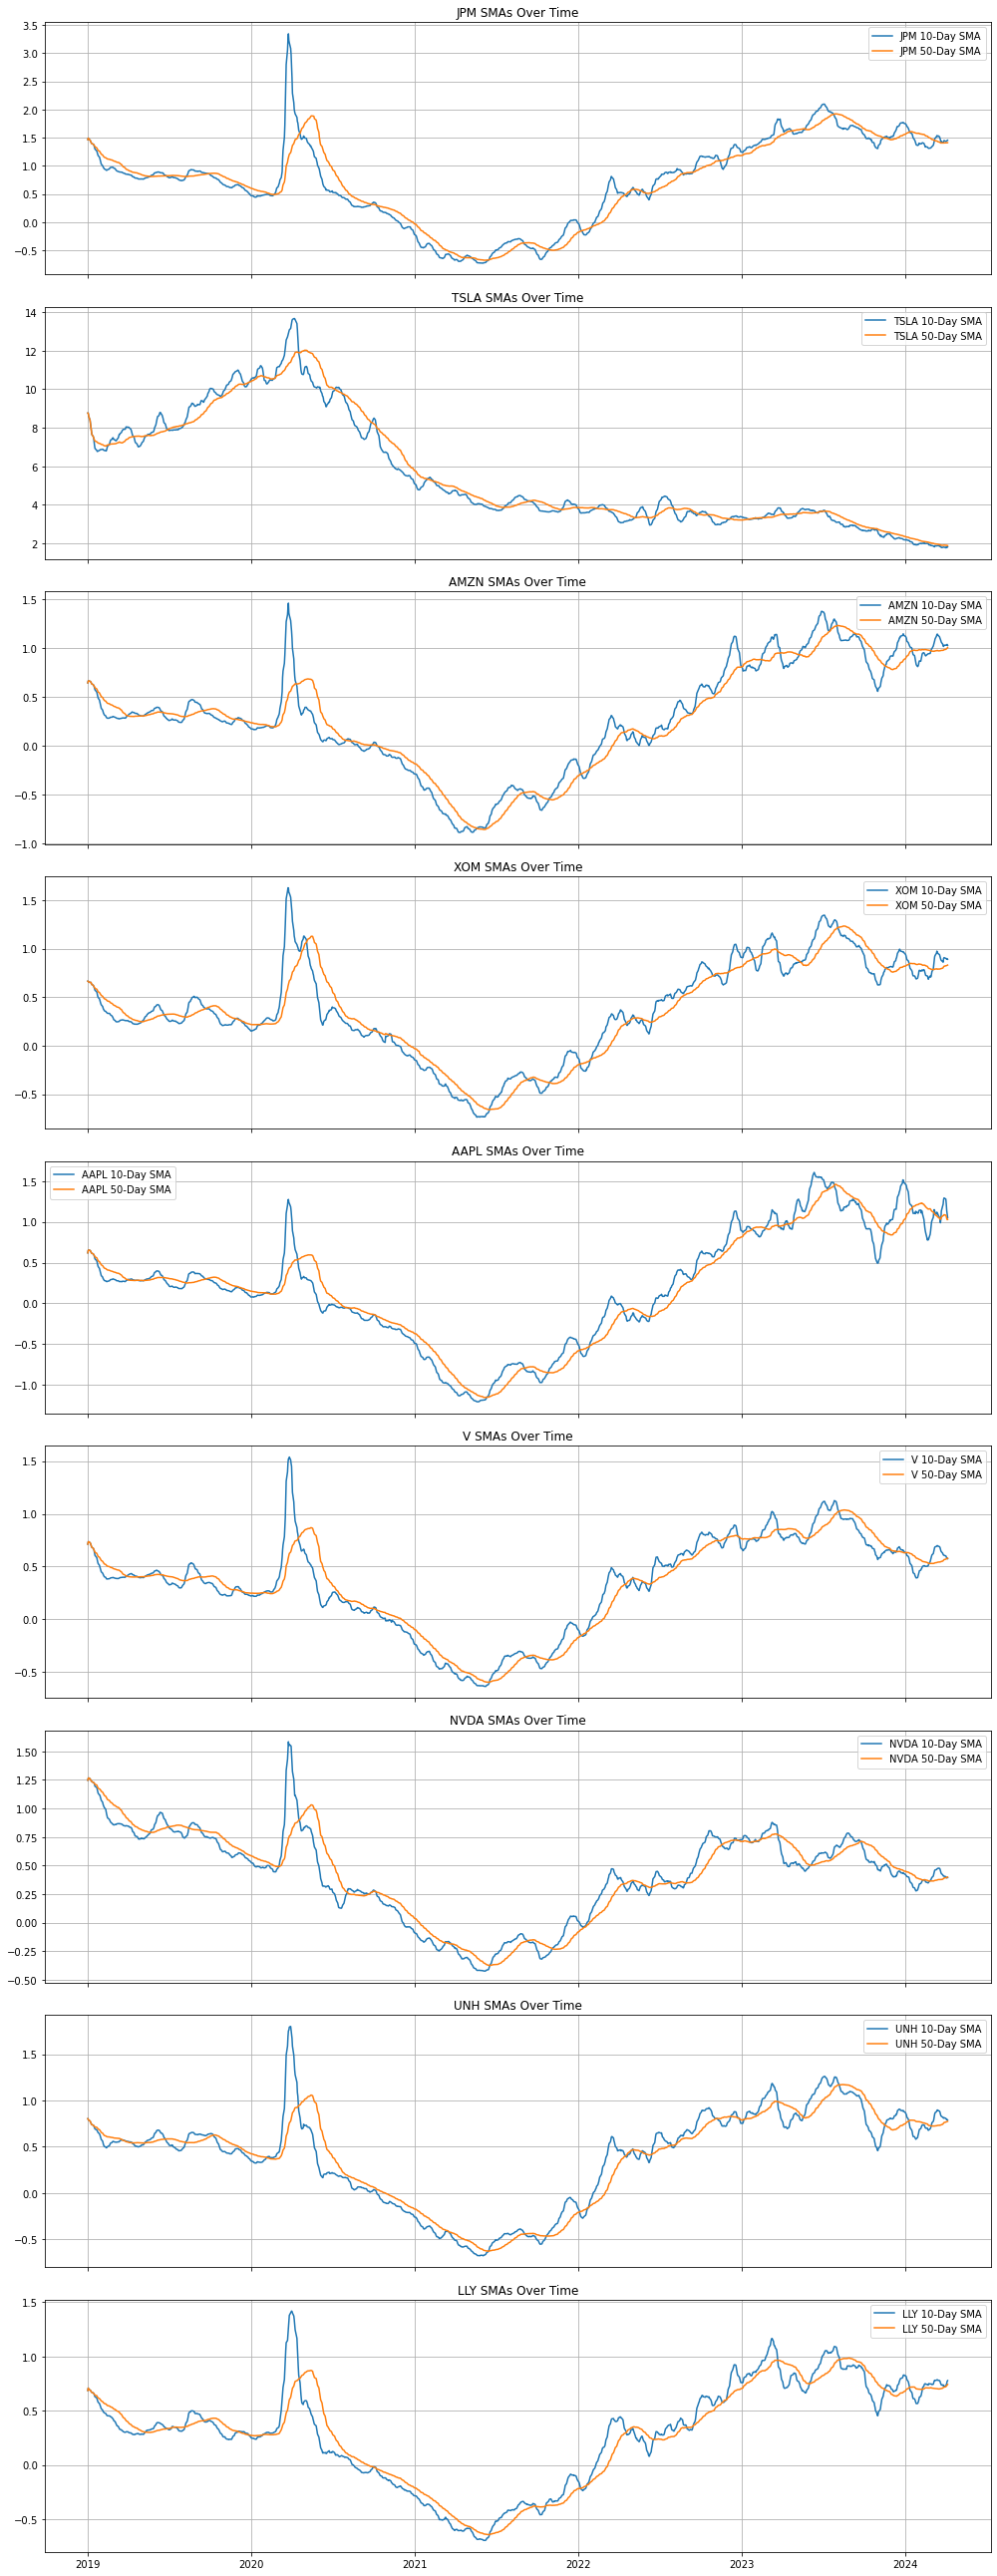

In [122]:
merged_df.set_index('Date', inplace=True)

# Find all unique companies from the 'Price' columns
companies = set(col.split('-')[0] for col in merged_df.columns if '-Price' in col)

# Plot short and long term SMAs for each company
fig, axes = plt.subplots(len(companies), 1, figsize=(14, 4 * len(companies)), sharex=True)

# Check if there's only one company, not to index axes which becomes an AxesSubplot instead of array of AxesSubplot
single_company = len(companies) == 1

for i, company in enumerate(companies):
    # Select the appropriate axis for the plot
    ax = axes[i] if not single_company else axes
    
    # Plotting the short-term and long-term SMAs
    sma_short_col = f'{company}-SMA_10'
    sma_long_col = f'{company}-SMA_50'
    
    ax.plot(merged_df.index, merged_df[sma_short_col], label=f'{company} 10-Day SMA')
    ax.plot(merged_df.index, merged_df[sma_long_col], label=f'{company} 50-Day SMA')
    ax.set_title(f'{company} SMAs Over Time')
    ax.legend()
    ax.grid(True)

# Improve spacing between plots
plt.tight_layout()
plt.show()

In [123]:
# Backtesting Function
def backtest_strategy_with_interest(data, initial_investment=10000):
    cash = initial_investment
    holdings = {company: 0 for company in companies}
    portfolio_values = []

    differences = {}
    for company in companies:
        differences[company] = 0

    differences_prev = {}
    for company in companies:
        differences_prev[company] = 0

    crossed = {}
    for company in companies:
        crossed[company] = False
    
    #buy only after crossovers occur
    #not buying or selling one bond on each date
    for date, row in data.iterrows():
        for company in companies:
            price_col = f'{company}-Price'
            yield_col = f'{company}-Yield'
            sma_short = f'{company}-SMA_10'
            sma_long = f'{company}-SMA_50'

            differences_prev = differences.copy()
            differences[company] = row[sma_short] - row[sma_long]

            if (differences_prev[company] < 0 and differences[company] > 0) or (differences_prev[company] > 0 and differences[company] < 0):
                crossed[company] = True

            print(differences)

            # Check for a crossover and adjust holdings accordingly
            if row[sma_short] > row[sma_long] and cash >= row[price_col] and crossed[company]:
                # Buy one bond
                holdings[company] += 1
                cash -= row[price_col]
            elif row[sma_short] < row[sma_long] and holdings[company] > 0 and crossed[company]:
                # Sell one bond
                holdings[company] -= 1
                cash += row[price_col]

        # Calculate the daily portfolio value
        daily_portfolio_value = cash + sum(holdings[company] * row[price_col] for company in companies)
        portfolio_values.append(daily_portfolio_value)

    portfolio_value_df = pd.DataFrame(portfolio_values, index=data.index, columns=['Portfolio Value'])
    
    return portfolio_value_df, holdings, cash

# Perform the backtest starting from 5 years ago
start_date = merged_df.index.max() - pd.DateOffset(years=5)
backtest_data = merged_df.loc[start_date:]
portfolio_value_df, holdings, cash = backtest_strategy_with_interest(backtest_data)


{'JPM': -0.06918000000000002, 'TSLA': 0, 'AMZN': 0, 'XOM': 0, 'AAPL': 0, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0, 'XOM': 0, 'AAPL': 0, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0.02406000000000008, 'XOM': 0, 'AAPL': 0, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0.02406000000000008, 'XOM': -0.04073999999999994, 'AAPL': 0, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0.02406000000000008, 'XOM': -0.04073999999999994, 'AAPL': 0.008440000000000003, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0.02406000000000008, 'XOM': -0.04073999999999994, 'AAPL': 0.008440000000000003, 'V': 0.024720000000000186, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.493680000000

In [124]:
# Benchmarking against equal amount invested in each bond with yearly interest payouts
def calculate_benchmark_portfolio(data, initial_investment=10000):
    investment_per_bond = initial_investment / len(companies)
    yearly_interest = {company: 0 for company in companies}
    portfolio_values = []
    year_flag = 2019

    for date, row in data.iterrows():
        # Check if it's the start of the year to reset the interest calculation
        
        if year_flag != date.year:
            for company in companies:
                price_col = f'{company}-Price'
                yield_col = f'{company}-Yield'
                yearly_interest[company] = (row[yield_col] / 100) * row[price_col]
        
        year_flag = date.year

        # Calculate the daily portfolio value considering the yearly interest payout
        daily_portfolio_value = sum(investment_per_bond + yearly_interest[company] for company in companies)
        portfolio_values.append(daily_portfolio_value)

    benchmark_portfolio_df = pd.DataFrame(portfolio_values, index=data.index, columns=['Benchmark Portfolio'])
    return benchmark_portfolio_df

benchmark_portfolio_df = calculate_benchmark_portfolio(backtest_data)

# Combine the backtest portfolio and benchmark portfolio
combined_portfolio_df = pd.concat([portfolio_value_df, benchmark_portfolio_df], axis=1)

combined_portfolio_df.head(), holdings, cash

(            Portfolio Value  Benchmark Portfolio
 Date                                            
 2019-04-05          10000.0              10000.0
 2019-04-08          10000.0              10000.0
 2019-04-09          10000.0              10000.0
 2019-04-10          10000.0              10000.0
 2019-04-11          10000.0              10000.0,
 {'JPM': 7,
  'TSLA': 0,
  'AMZN': 13,
  'XOM': 10,
  'AAPL': 7,
  'V': 16,
  'NVDA': 12,
  'UNH': 14,
  'LLY': 25},
 22.689999999996644)

{'JPM': -0.06918000000000002, 'TSLA': 0, 'AMZN': 0, 'XOM': 0, 'AAPL': 0, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0, 'XOM': 0, 'AAPL': 0, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0.02406000000000008, 'XOM': 0, 'AAPL': 0, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0.02406000000000008, 'XOM': -0.04073999999999994, 'AAPL': 0, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0.02406000000000008, 'XOM': -0.04073999999999994, 'AAPL': 0.008440000000000003, 'V': 0, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.49368000000000123, 'AMZN': 0.02406000000000008, 'XOM': -0.04073999999999994, 'AAPL': 0.008440000000000003, 'V': 0.024720000000000186, 'NVDA': 0, 'UNH': 0, 'LLY': 0}
{'JPM': -0.06918000000000002, 'TSLA': 0.493680000000

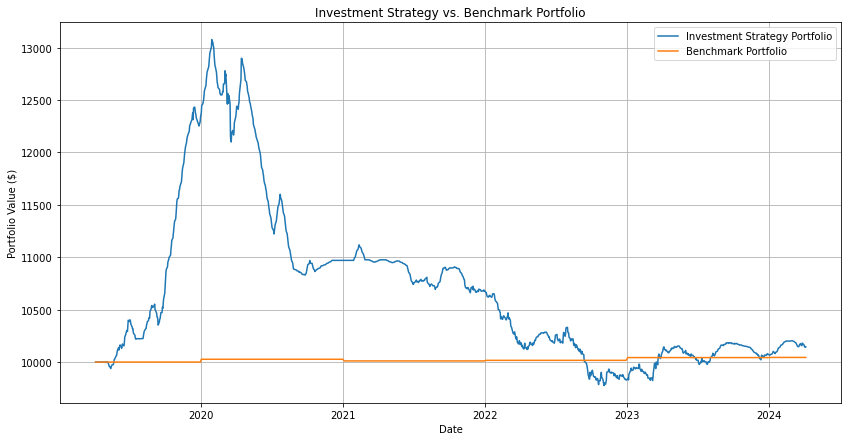

{'JPM': 7, 'TSLA': 0, 'AMZN': 13, 'XOM': 10, 'AAPL': 7, 'V': 16, 'NVDA': 12, 'UNH': 14, 'LLY': 25}
22.689999999996644


In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load merged data
merged_df = pd.read_csv('merged.csv', parse_dates=['Date'])
merged_df.set_index('Date', inplace=True)

# Make sure all financial data is float
financial_cols = [col for col in merged_df.columns if 'Price' in col or 'Yield' in col]
merged_df[financial_cols] = merged_df[financial_cols].astype(float)

# Calculate SMAs for each company's spread
companies = set(col.split('-')[0] for col in merged_df.columns if 'Price' in col)
calculate_smas(merged_df)

# Backtest the strategy starting from 5 years ago
start_date = merged_df.index.max() - pd.DateOffset(years=5)
backtest_data = merged_df.loc[start_date:]
portfolio_value_df, holdings, cash = backtest_strategy_with_interest(backtest_data)

# Calculate the benchmark portfolio
benchmark_portfolio_df = calculate_benchmark_portfolio(backtest_data)

# Combine the backtest portfolio and benchmark portfolio
combined_portfolio_df = pd.concat([portfolio_value_df, benchmark_portfolio_df], axis=1)

# Plotting the comparison
plt.figure(figsize=(14, 7))
plt.plot(combined_portfolio_df.index, combined_portfolio_df['Portfolio Value'], label='Investment Strategy Portfolio')
plt.plot(combined_portfolio_df.index, combined_portfolio_df['Benchmark Portfolio'], label='Benchmark Portfolio')
plt.title('Investment Strategy vs. Benchmark Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Print final holdings and cash
print(holdings)
print(cash)
